<img src="assets/bricks.jpg">

<h3>Lego Analysis Stuff</h3> 

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

<h2>Checking if there are any Null Data in Colors CSV</h2>

In [3]:
colors_csv = pd.read_csv("data/colors.csv")

In [4]:
colors_csv.isna().sum()

id          0
name        0
rgb         0
is_trans    0
dtype: int64

<h2>Finding How Many Unique Colors that Lego Bricks Have</h2> 

In [5]:
unique_color = colors_csv["name"].unique()
print(f"There are: {len(unique_color)} unique color")

There are: 135 unique color


<h2>Finding out How many colors are transparent and how many is Opaque</h2>

In [6]:
transparent_color = [color for color in colors_csv['is_trans'] if color == "t"]
opaque_color = [color for color in colors_csv['is_trans'] if color == "f"]
print(f"There Are: {len(transparent_color)} Transparent Color")
print(f"There Are: {len(opaque_color)} Opaque Color")

There Are: 28 Transparent Color
There Are: 107 Opaque Color


In [7]:
# Second Way
colors_csv.groupby(["is_trans"]).count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [8]:
colors_csv['is_trans'].value_counts()

f    107
t     28
Name: is_trans, dtype: int64

# Markdown Challenge

Walk into a LEGO store and you will see their products organised by theme. Their theme include Star Wars, Batman, Harry Potter and many more. <img src="assets/lego_themes.png">

<br> A Lego <strong>Sets</strong> is a particular box of Lego or Product. Therefore, a single theme typically has many different sets. <img src="assets/lego_sets.png">

## Exploring Sets CSV

### Checking if The Sets CSV has any Null Value

In [9]:
set_csv = pd.read_csv("data/sets.csv")
set_csv.isna().sum()

set_num      0
name         0
year         0
theme_id     0
num_parts    0
dtype: int64

### when did the first lego set was released

In [10]:
earliest_set = set_csv["year"].agg("min")
print(f"The earliest set is produced in: {earliest_set}")

The earliest set is produced in: 1949


### How many Different Product did Lego sells in their first year

In [11]:
first_year_sets = set_csv[set_csv["year"]==earliest_set]["name"].count()
print(f"There are {first_year_sets} sets when LEGO first started business")

There are 5 sets when LEGO first started business


### What Are the Top 5 Lego Sets with the most number of parts

In [12]:
sorted_set_num = set_csv.sort_values(by=["num_parts"], ascending=False)
sorted_set_num.head(10)

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922
11471,75978-1,Diagon Alley,2020,246,5547
15612,SWMP-1,Star Wars / M&M Mosaic - Promo Set,2005,158,5462
1689,2000409-1,Window Exploration Bag,2010,507,5200
212,10179-1,Millennium Falcon - UCS,2007,171,5195
9805,70620-1,NINJAGO City,2017,616,4873


### How many LEGO sets that are released per year by LEGO

In [13]:
sets_per_year = set_csv.groupby(["year"]).count()

In [14]:
sets_per_year

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28
...,...,...,...,...
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840


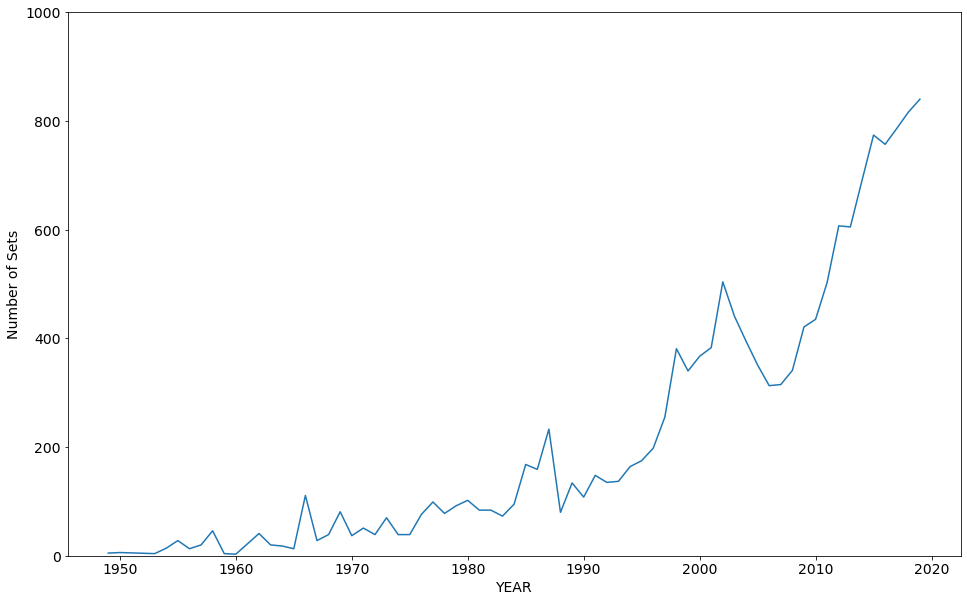

In [15]:
# Setting the Plot Size
plt.figure(figsize=(16,10))

# yticks and xticks to set fontsize
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Give label using xlabel and ylabel
plt.xlabel("YEAR", fontsize=14)
plt.ylabel("Number of Sets", fontsize = 14)

# Give Limit to y axis
plt.ylim(0,1000)
plt.plot(sets_per_year.index[:-2], sets_per_year['name'][:-2])

### Seeing How Many Themes are produced each year using Groupby and Agg

In [16]:
themes_per_year = set_csv.groupby('year').agg({"theme_id": pd.Series.nunique})

In [17]:
themes_per_year

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


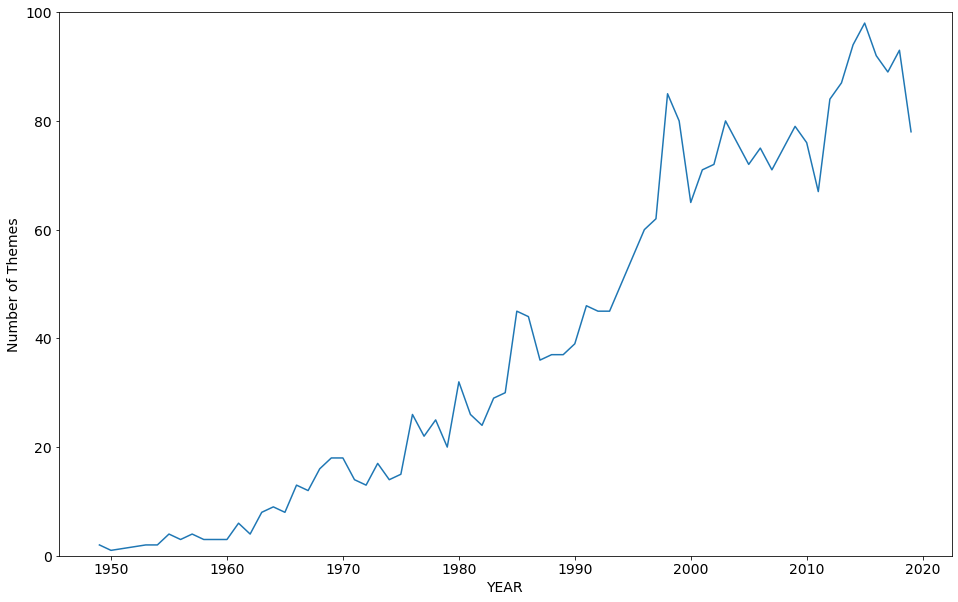

In [18]:
# Setting the Plot Size
plt.figure(figsize=(16,10))

# yticks and xticks to set fontsize
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Give label using xlabel and ylabel
plt.xlabel("YEAR", fontsize=14)
plt.ylabel("Number of Themes", fontsize = 14)

# Give Limit to y axis
plt.ylim(0,100)
plt.plot(themes_per_year.index[:-2], themes_per_year['theme_id'][:-2])

## Data Visualization with two Y Axis

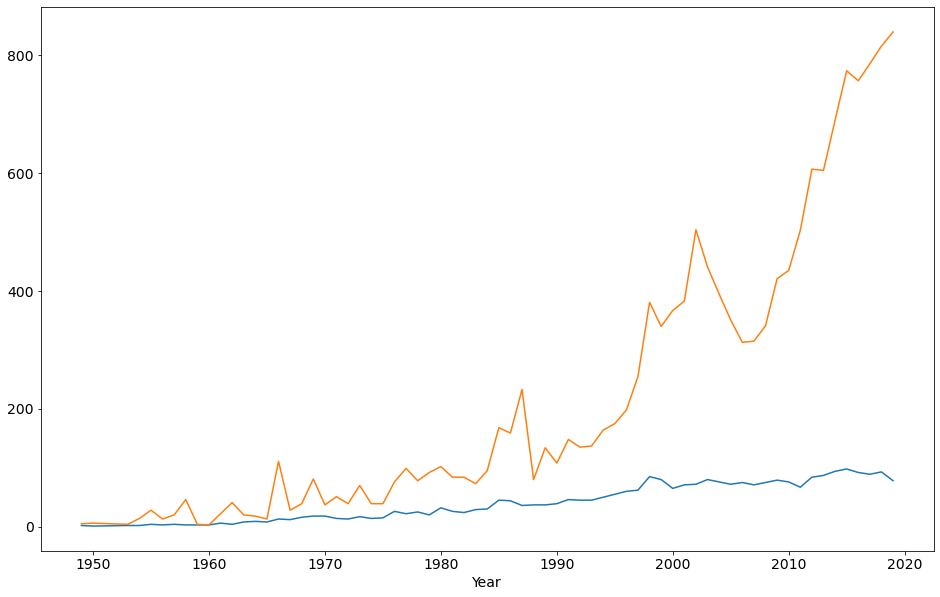

In [22]:
# Combining Sets per year and Themes per year
# But its bad since the range is different (set per year is 0-900, themes is 0-99)
plt.figure(figsize = (16,10))

plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)

plt.xlabel("Year", fontsize = 14)

plt.plot(themes_per_year.index[:-2], themes_per_year.theme_id[:-2])
plt.plot(sets_per_year.index[:-2], sets_per_year['set_num'][:-2])

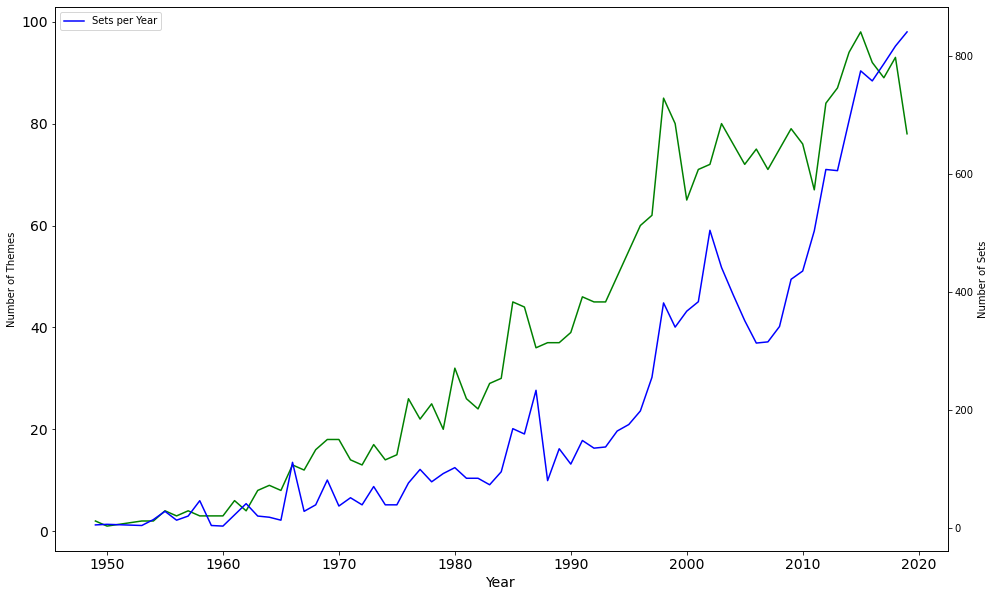

In [26]:
# Combining Sets per year and Themes per year
# Using Superimposing to graph the two data into one chart
plt.figure(figsize = (16,10))

plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)

plt.xlabel("Year", fontsize = 14)

axis_1 = plt.gca() # This will force create the left y axis
axis_2 = axis_1.twinx() # This will force the creation of y axis on the right side

axis_1.plot(themes_per_year.index[:-2], themes_per_year.theme_id[:-2], color='g', label="Themes per Year")
axis_2.plot(sets_per_year.index[:-2], sets_per_year['set_num'][:-2], color='b', label="Sets per Year")

# This give y axis name
axis_1.set_ylabel('Number of Themes')
axis_2.set_ylabel('Number of Sets')

# This + the label argument in the .plot method will generate a legend 
plt.legend(loc="upper left")


## Create a new dataseries That contains Year as Index and Average number of parts per set in that year

In [38]:
parts_per_set = set_csv.groupby('year').agg({"num_parts": pd.Series.mean})

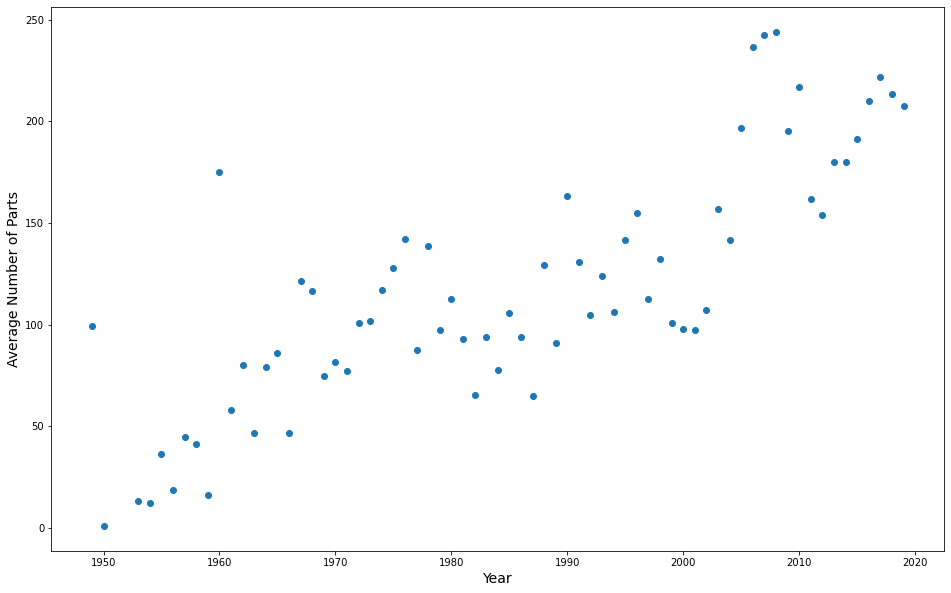

In [41]:
plt.figure(figsize=(16,10))

plt.xlabel("Year", fontsize = 14)
plt.ylabel("Average Number of Parts", fontsize = 14)

plt.scatter(parts_per_set.index[:-2], parts_per_set.num_parts[:-2])

## Connecting 2 Dataframes or Table Using Primary and Foreign Key Concepts

In [43]:
# This counts how many themes per ID
sets_theme_count = set_csv['theme_id'].value_counts()
sets_theme_count

158    753
501    656
494    398
435    356
503    329
      ... 
307      1
215      1
361      1
210      1
414      1
Name: theme_id, Length: 571, dtype: int64

<img src="assets/rebrickable_schema.png">

In [48]:
# Create a new Dataframe, we are going to add a column from different csv to this dataframe
sets_theme_count = pd.DataFrame({'id':sets_theme_count.index,
                                'set_count':sets_theme_count.values})

In [51]:
# We add a column from a different csv using the merge method with argument 'on' to specify the keys
theme_data = pd.read_csv('data/themes.csv')
merged_sets = pd.merge(sets_theme_count, theme_data, on='id')
print(merged_sets.head())

    id  set_count       name  parent_id
0  158        753  Star Wars        NaN
1  501        656       Gear        NaN
2  494        398    Friends        NaN
3  435        356    Ninjago        NaN
4  503        329  Key Chain      501.0


<BarContainer object of 10 artists>

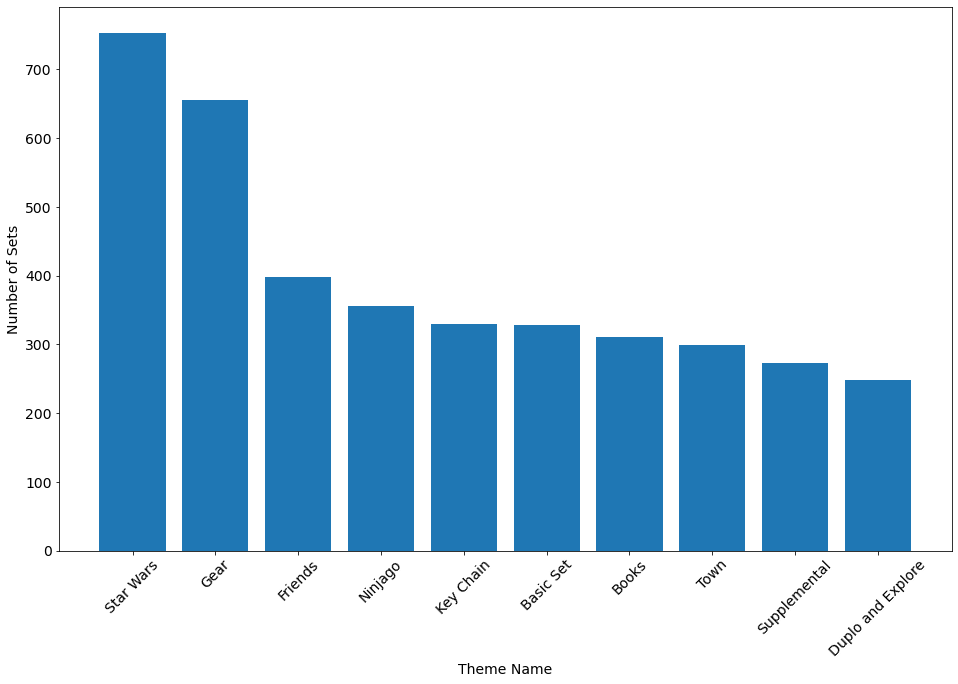

In [53]:
# Create a Bar Chart to visualize the number of set per themes
plt.figure(figsize=(16,10))

plt.xticks(fontsize = 14, rotation = 45)
plt.yticks(fontsize = 14)

plt.ylabel("Number of Sets", fontsize = 14)
plt.xlabel("Theme Name", fontsize = 14)

plt.bar(merged_sets['name'][:10], merged_sets['set_count'][:10])